In [1]:
import pandas as pd

In [2]:
import scanpy as sc

from warnings import filterwarnings
filterwarnings('ignore')

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.2 scipy==1.9.1 pandas==1.5.0 scikit-learn==1.1.2 statsmodels==0.13.5 pynndescent==0.5.8


In [3]:
adata = sc.read_h5ad('../data/sc_training.h5ad')
adata

AnnData object with n_obs × n_vars = 28697 × 15077
    obs: 'gRNA_maxID', 'state', 'condition', 'lane'
    layers: 'rawcounts'

In [4]:
df = pd.DataFrame(adata.X.toarray(), columns=adata.var_names, index=adata.obs_names)

# merge df with adata.obs
df = pd.concat([adata.obs, df], axis=1)

In [5]:
df

,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Slc3a1,Cfap53,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1,0.511520,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTCGTTTG-1,Tox2-3,terminal exhausted,Tox2,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCATCAGGTTCA-1,Tox2-3,other,Tox2,lane4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCCTCGCAT-1,Zeb2-2,cycling,Zeb2,lane4,0.000000,0.000000,0.000000,0.515672,0.515672,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


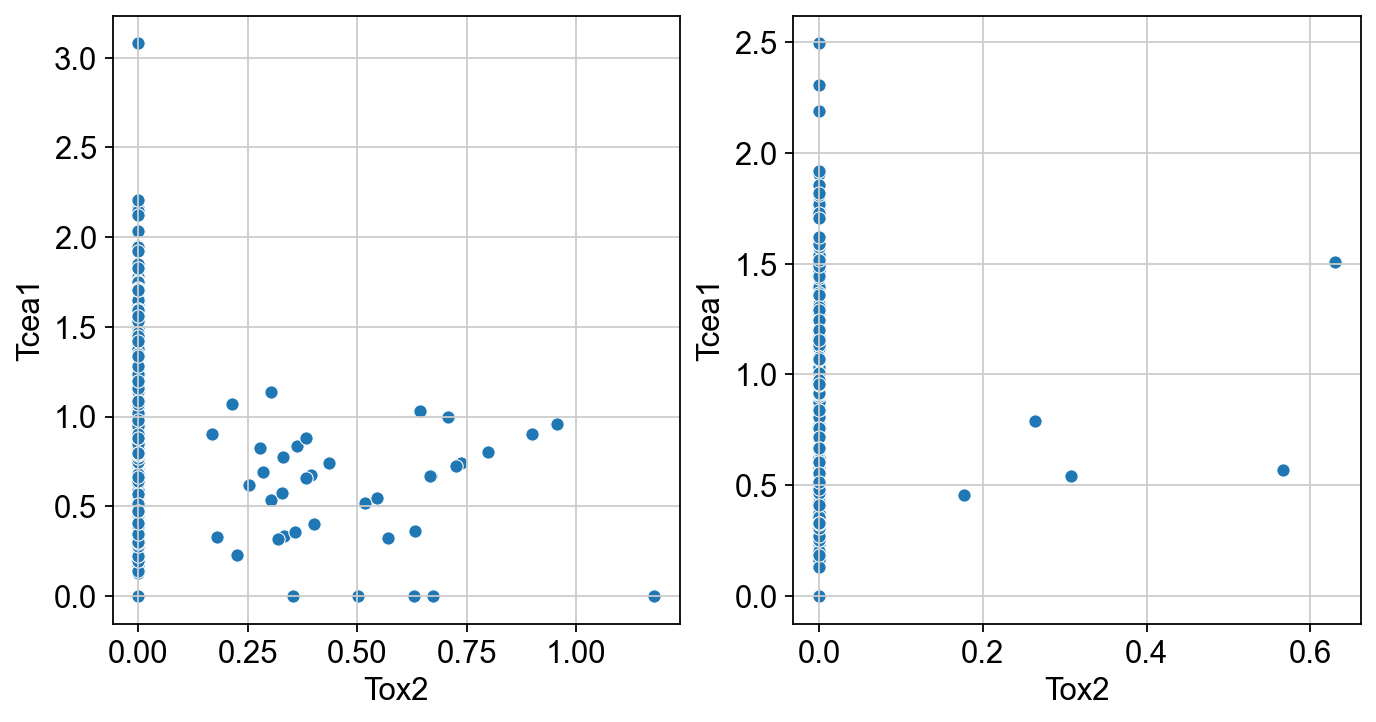

In [6]:
# two scatterplot next to each other 
import matplotlib.pyplot as plt
import seaborn as sns

knockout = "Tox2"
y = "Tcea1"

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.scatterplot(x=knockout, y=y, data=df[df["condition"] == "Unperturbed"], ax=ax[0])
sns.scatterplot(x=knockout, y=y, data=df[df["condition"] == knockout], ax=ax[1])
plt.show()


<AxesSubplot:xlabel='Tox2', ylabel='Tcea1'>

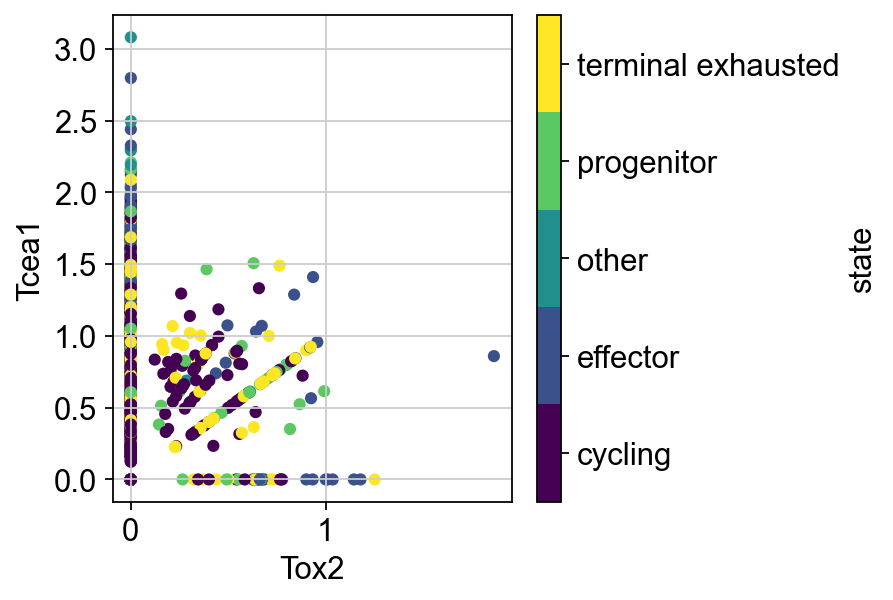

In [7]:
df.plot.scatter(x='Tox2', y='Tcea1', c='state', colormap='viridis')


In [8]:
df

,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Slc3a1,Cfap53,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1,0.511520,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTCGTTTG-1,Tox2-3,terminal exhausted,Tox2,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCATCAGGTTCA-1,Tox2-3,other,Tox2,lane4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCCTCGCAT-1,Zeb2-2,cycling,Zeb2,lane4,0.000000,0.000000,0.000000,0.515672,0.515672,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# encode state as numbers
df['state_cat'] = df['state'].astype('category').cat.codes
df["state_cat"]

053l1_AAACCTGAGATGTCGG-1    4
053l1_AAACCTGAGCAACGGT-1    1
053l1_AAACCTGAGTACGACG-1    1
053l1_AAACCTGAGTCGTTTG-1    4
053l1_AAACCTGAGTGAAGAG-1    1
                           ..
053l4_TTTGTCATCAGGTTCA-1    2
053l4_TTTGTCATCAGTGTTG-1    0
053l4_TTTGTCATCCTCGCAT-1    0
053l4_TTTGTCATCTTCAACT-1    0
053l4_TTTGTCATCTTTCCTC-1    0
Name: state_cat, Length: 28697, dtype: int8

In [10]:
from sklearn.linear_model import Lasso

X = df.drop(['state', 'condition', 'Tox2', 'gRNA_maxID', 'lane'], axis=1)
y = df['Mrpl15']

lm = Lasso()
lm.fit(X, y)

print(lm.intercept_)
print(lm.coef_)

print(lm.score(X, y))

0.37740022
[ 0.  0.  0. ... -0. -0. -0.]
0.0


123


<AxesSubplot:xlabel='Tox2', ylabel='Mrpl15'>

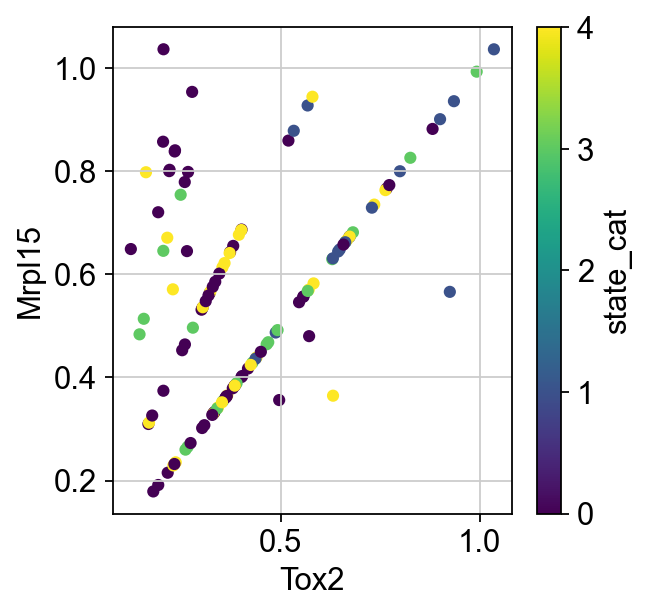

In [11]:
# remove rows where Mrpl15 or Tox2 is 0
x = "Tox2"
y = "Mrpl15"
data = df[(df[y] > 0) & (df[x] > 0)]
print(len(data))
data.plot.scatter(x=x, y=y, c='state_cat', colormap='viridis')

In [12]:
# remove columns with 0 standard deviation
var_cols = data.drop(['state', 'condition', 'gRNA_maxID', 'lane'], axis=1).loc[:, data.std() > 0.7]

# merge df x and y columns to var_cols
var_cols = pd.concat([var_cols, data[x], data[y]], axis=1)
var_cols

,Xcl1,Ube2c,S100a4,S100a6,Plac8,Hmgb2,Junb,Mt1,Lars2,Ccl5,...,Hist1h2ae,Hist1h1e,Gzmb,Ly6c2,Tuba1b,Tubb5,Gm42418,state_cat,Tox2,Mrpl15
053l1_AACACGTAGCCACTAT-1,0.000000,2.126953,2.798007,3.340553,1.837059,2.785059,1.692595,1.568656,0.191547,2.731525,...,0.989160,1.200670,2.660307,2.534625,2.703644,2.428775,1.870135,0,0.191547,0.191547
053l1_AACTTTCGTTGACGTT-1,0.000000,0.000000,3.374783,3.793514,0.000000,3.073656,0.000000,0.000000,1.153924,2.560196,...,0.000000,0.000000,2.016479,1.860434,0.000000,0.734915,3.022155,4,0.734915,0.734915
053l1_ACACCCTGTAACGTTC-1,0.502167,1.246669,1.927264,2.353617,1.643784,2.000470,1.692976,1.449620,1.537485,2.413756,...,1.449620,1.127315,2.162992,1.982665,2.017963,1.318993,2.365937,0,0.122624,0.648787
053l1_ACCGTAAGTCGTGGCT-1,0.000000,1.443277,0.000000,0.000000,0.000000,2.739450,1.753506,1.367748,0.143257,0.000000,...,0.571054,0.268539,0.000000,0.379859,2.517530,2.453400,1.753506,0,0.571054,0.480019
053l1_ACTATCTTCACTCCTG-1,0.000000,0.000000,0.763208,1.351410,0.888481,2.609821,0.619964,1.422905,0.452714,2.133392,...,2.651070,2.450368,1.666631,1.099947,1.862443,1.552175,2.373393,0,0.251760,0.452714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TGAGCCGTCGCAAACT-1,0.000000,0.000000,2.190726,3.026294,2.137066,2.336327,0.659755,0.000000,0.659755,2.955909,...,2.380502,1.735469,3.048696,1.335778,1.335778,1.451640,2.709034,0,0.383328,0.383328
053l4_TGGGCGTAGTCAATAG-1,0.317868,1.474250,1.474250,1.768924,2.337459,2.407240,1.177169,1.384684,0.558696,2.300653,...,1.556449,2.138171,2.337459,1.177169,2.181333,1.384684,2.562967,0,0.317868,0.558696
053l4_TGTCCCAAGTCCGGTC-1,0.000000,0.000000,2.424940,3.155984,1.958302,1.889949,0.384073,0.877449,0.000000,4.147531,...,0.660885,0.000000,2.578288,1.453431,1.453431,0.660885,2.542099,4,0.384073,0.384073
053l4_TTAGGCAGTCCAGTTA-1,0.000000,2.016130,2.640372,2.926803,0.657461,2.821859,2.016130,1.332276,0.000000,3.735644,...,2.332034,1.883931,2.571736,2.571736,2.016130,1.883931,2.418478,0,0.657461,0.657461


In [13]:
from sklearn.linear_model import LinearRegression, Lasso, RANSACRegressor
from lineartree import LinearTreeRegressor
from sklearn.datasets import make_regression


X_train = var_cols.drop([y], axis=1)
y_train = var_cols[y]
lt = LinearTreeRegressor(base_estimator=LinearRegression(), max_depth=3)
# lt = RANSACRegressor()
lt.fit(X_train, y_train)

print(lt.score(X_train, y_train))

0.9852893415307155


In [50]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.1, min_samples=5).fit(df[[x,y]])
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

5

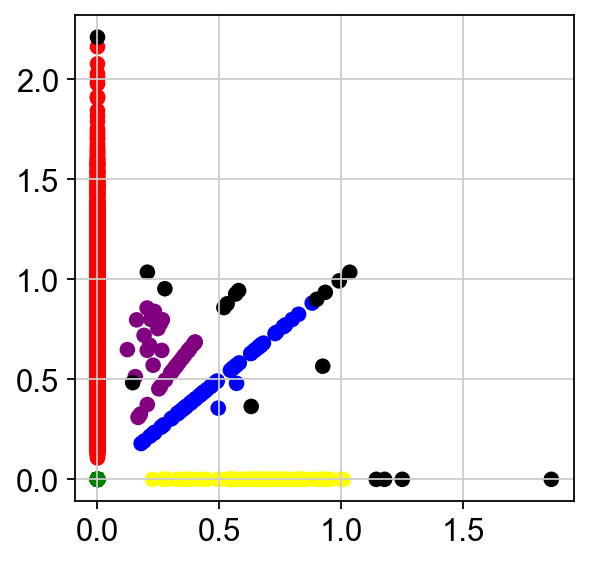

In [52]:
d= dict(zip(set(labels),['red','green','blue','yellow','purple']))
d[-1] = "black"
plt.scatter(df[x], df[y],color=[d[i] for i in labels])
plt.show()

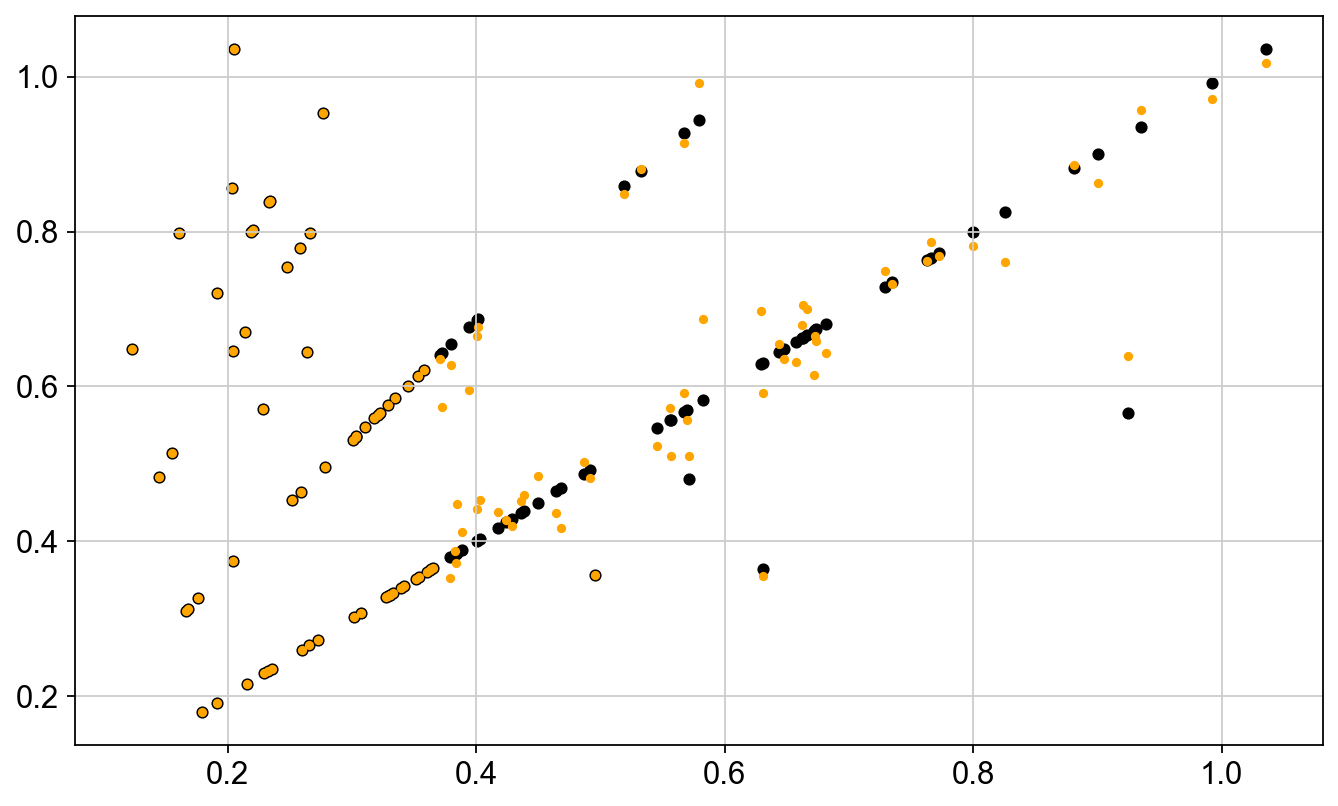

In [123]:
plt.figure(figsize=(10,6))
plt.scatter(var_cols[x], var_cols[y], s=20, c='black')
plt.scatter(var_cols[x], lt.predict(X_train), s=10, c='orange')
plt.show()

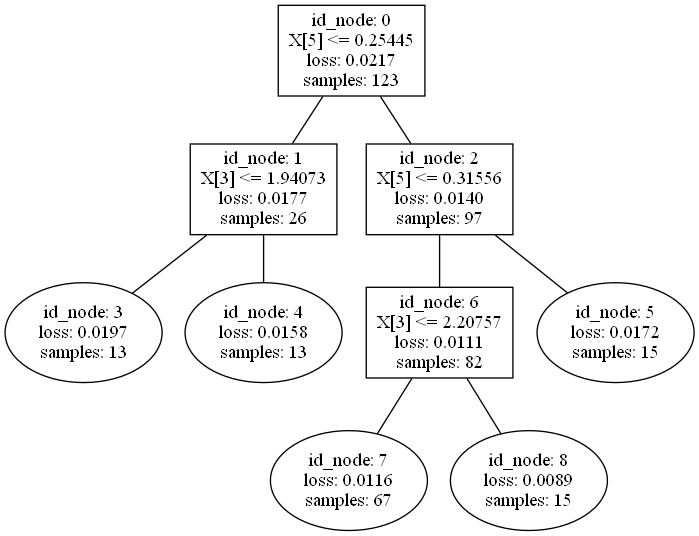

In [104]:
lt.plot_model()


In [22]:
coef = pd.Series(lm.coef_, index = X.columns)
imp_coef = coef.sort_values()
imp_coef.head(10)

Usp18       -0.0
Gm44148     -0.0
Slc6a13      0.0
Slc6a12      0.0
Klrg1        0.0
M6pr         0.0
Phc1        -0.0
Apobec1     -0.0
Bcl2l13      0.0
state_cat   -0.0
dtype: float32

In [ ]:
# find 